In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [42]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D , ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

In [43]:
input_shape =[150,150,3]
img_width = 150
img_height = 150
batch_size=16

In [44]:
train_data_dir = 'E:/Data_Trained_Deep_Learning/Flipcart_Jeans_Trousers/Train'
validation_data_dir = 'E:/Data_Trained_Deep_Learning/Flipcart_Jeans_Trousers/Validation'

In [45]:
datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=[img_width,img_height],
        batch_size=16,
        class_mode='binary')

Found 160 images belonging to 2 classes.


In [47]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=[img_width,img_height],
        batch_size=16,
        class_mode='binary')

Found 40 images belonging to 2 classes.


In [48]:
model = Sequential()

model.add(Conv2D(32, (3,3) , input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range= 30,
        horizontal_flip=True)


train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        class_mode='binary')





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
__________

In [49]:
nb_train_samples = 160
nb_validation_samples= 40
batch_size = 32
epochs =30

In [50]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/30
5/5 [==============================] - 3s 624ms/step - loss: 3.1195 - acc: 0.4750 - val_loss: 0.6903 - val_acc: 0.5625
Epoch 2/30
5/5 [==============================] - 1s 249ms/step - loss: 0.7263 - acc: 0.5750 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 248ms/step - loss: 0.6747 - acc: 0.5750 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 225ms/step - loss: 0.7080 - acc: 0.4250 - val_loss: 0.6892 - val_acc: 0.6875
Epoch 5/30
5/5 [==============================] - 1s 228ms/step - loss: 0.6976 - acc: 0.5250 - val_loss: 0.6922 - val_acc: 0.5625
Epoch 6/30
5/5 [==============================] - 1s 211ms/step - loss: 0.6774 - acc: 0.6000 - val_loss: 0.6711 - val_acc: 1.0000
Epoch 7/30
5/5 [==============================] - 1s 216ms/step - loss: 0.6475 - acc: 0.6625 - val_loss: 0.6812 - val_acc: 0.5625
Epoch 8/30
5/5 [==============================] - 1s 219ms/step - loss: 0.6573 - acc: 0.58

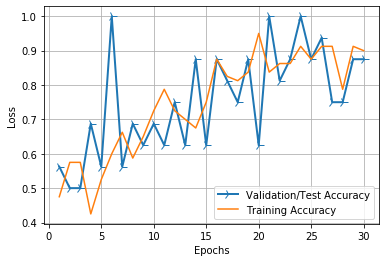

In [52]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()








